In [39]:
!pip install ipynb

tensor(3)


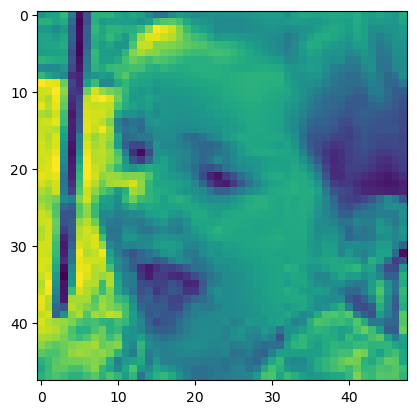

In [41]:
from ipynb.fs.full.data_loaders import Plain_Dataset, eval_data_dataloader
from ipynb.fs.full.deep_emotion import Deep_Emotion

In [43]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [53]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,) , (0.5,))
])

train_csv = "C:\\Users\\harsh\\Z\\ResearchPaper/train.csv"
val_csv = "C:\\Users\\harsh\\Z\\ResearchPaper/val.csv"
train_img_dir = "C:\\Users\\harsh\\Z\\ResearchPaper/train/"
val_img_dir = "C:\\Users\\harsh\\Z\\ResearchPaper/val/"

train_dataset = Plain_Dataset(csv_file=train_csv, img_dir=train_img_dir, datatype="train", transform=transform)
val_dataset = Plain_Dataset(csv_file=val_csv, img_dir=val_img_dir, datatype="val", transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Deep_Emotion().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Save the trained model
torch.save(model.state_dict(), "deep_emotion_model.pth")
print("Model training complete and saved!")

Epoch [1/50], Loss: 1.6923
Epoch [2/50], Loss: 1.5559
Epoch [3/50], Loss: 1.4804
Epoch [4/50], Loss: 1.4217
Epoch [5/50], Loss: 1.3799
Epoch [6/50], Loss: 1.3509
Epoch [7/50], Loss: 1.3279
Epoch [8/50], Loss: 1.3045
Epoch [9/50], Loss: 1.2910
Epoch [10/50], Loss: 1.2765
Epoch [11/50], Loss: 1.2618
Epoch [12/50], Loss: 1.2476
Epoch [13/50], Loss: 1.2516
Epoch [14/50], Loss: 1.2297
Epoch [15/50], Loss: 1.2259
Epoch [16/50], Loss: 1.2164
Epoch [17/50], Loss: 1.2109
Epoch [18/50], Loss: 1.2075
Epoch [19/50], Loss: 1.2053
Epoch [20/50], Loss: 1.1869
Epoch [21/50], Loss: 1.1884
Epoch [22/50], Loss: 1.1830
Epoch [23/50], Loss: 1.1805
Epoch [24/50], Loss: 1.1831
Epoch [25/50], Loss: 1.1692
Epoch [26/50], Loss: 1.1629
Epoch [27/50], Loss: 1.1626
Epoch [28/50], Loss: 1.1491
Epoch [29/50], Loss: 1.1526
Epoch [30/50], Loss: 1.1450
Epoch [31/50], Loss: 1.1463
Epoch [32/50], Loss: 1.1404
Epoch [33/50], Loss: 1.1361
Epoch [34/50], Loss: 1.1319
Epoch [35/50], Loss: 1.1364
Epoch [36/50], Loss: 1.1296
E

In [55]:
# Load trained model
model.load_state_dict(torch.load("deep_emotion_model.pth"))
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Accuracy: 51.63%
